In [1]:
pip install ruptures


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from datetime import date, datetime, timedelta


from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import ruptures as rpt


In [3]:
# the Pandas library and is used to read a CSV file into a DataFrame
df = pd.read_csv("./cleaned_dataset.csv")

C:\Users\heman\AppData\Local\Temp\ipykernel_21584\633579176.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./cleaned_dataset.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547614 entries, 0 to 3547613
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   Acc_X             float64
 2   Acc_Y             float64
 3   Acc_Z             float64
 4   EDA_Level         float64
 5   Heart_Rate        float64
 6   Skin_Temperature  float64
 7   id                object 
 8   datetime          object 
 9   Stress_Level      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 270.7+ MB


In [5]:
df.describe()

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,EDA_Level,Heart_Rate,Skin_Temperature,Stress_Level
count,3.547614e+06,3.547614e+06,3.547614e+06,3.547614e+06,3.547614e+06,3.547614e+06,3.547614e+06,3.547614e+06
mean,1.773806e+06,-3.184147e+01,2.491204e-01,2.419172e+01,2.921197e+00,8.740788e+01,3.184846e+01,1.475020e+00
std,1.024108e+06,2.656315e+01,3.456945e+01,2.839852e+01,5.005628e+00,1.293654e+01,2.072024e+00,8.799754e-01
min,0.000000e+00,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00
25%,8.869032e+05,-5.200000e+01,-1.800000e+01,7.000000e+00,4.420060e-01,7.842000e+01,3.035000e+01,0.000000e+00
50%,1.773806e+06,-3.500000e+01,2.000000e+00,2.600000e+01,1.063457e+00,8.538000e+01,3.195000e+01,2.000000e+00
75%,2.660710e+06,-1.600000e+01,1.900000e+01,4.700000e+01,3.047424e+00,9.425000e+01,3.353000e+01,2.000000e+00
max,3.547613e+06,1.270000e+02,1.270000e+02,1.270000e+02,4.458383e+01,1.701200e+02,3.643000e+01,2.000000e+00


In [6]:
df.head()

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,EDA_Level,Heart_Rate,Skin_Temperature,id,datetime,Stress_Level
0,0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [7]:
df.isnull().sum()

Unnamed: 0          0
Acc_X               0
Acc_Y               0
Acc_Z               0
EDA_Level           0
Heart_Rate          0
Skin_Temperature    0
id                  0
datetime            0
Stress_Level        0
dtype: int64

In [8]:
df['Stress_Level'].dtype

dtype('float64')

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
# This will identifying monthly trend  
df['datetime'].dt.to_period('M')

0          2020-07
1          2020-07
2          2020-07
3          2020-07
4          2020-07
            ...   
3547609    2020-07
3547610    2020-07
3547611    2020-07
3547612    2020-07
3547613    2020-07
Name: datetime, Length: 3547614, dtype: period[M]

In [11]:
df['id']  = df['id'].astype(str)

In [12]:
from sklearn import preprocessing
  
# Create an instance of the LabelEncoder class
label_encoder = preprocessing.LabelEncoder()
  
# Use the LabelEncoder to encode the "id" column as numerical values
df['id']= label_encoder.fit_transform(df['id'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547614 entries, 0 to 3547613
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   Acc_X             float64       
 2   Acc_Y             float64       
 3   Acc_Z             float64       
 4   EDA_Level         float64       
 5   Heart_Rate        float64       
 6   Skin_Temperature  float64       
 7   id                int32         
 8   datetime          datetime64[ns]
 9   Stress_Level      float64       
dtypes: datetime64[ns](1), float64(7), int32(1), int64(1)
memory usage: 257.1 MB


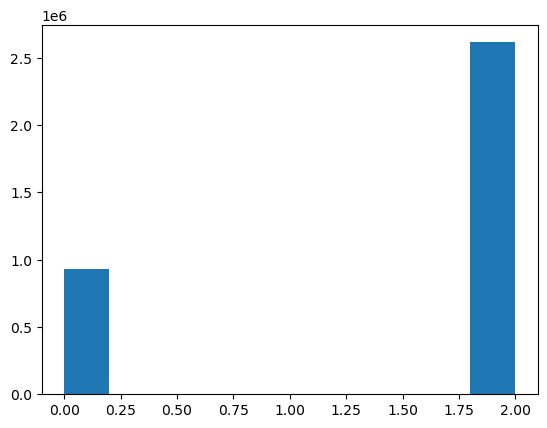

In [14]:
# Plot a histogram of the "Stress_Level" column of the DataFrame
plt.hist(df['Stress_Level'])
# Display the plot
plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_21584\177350145.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


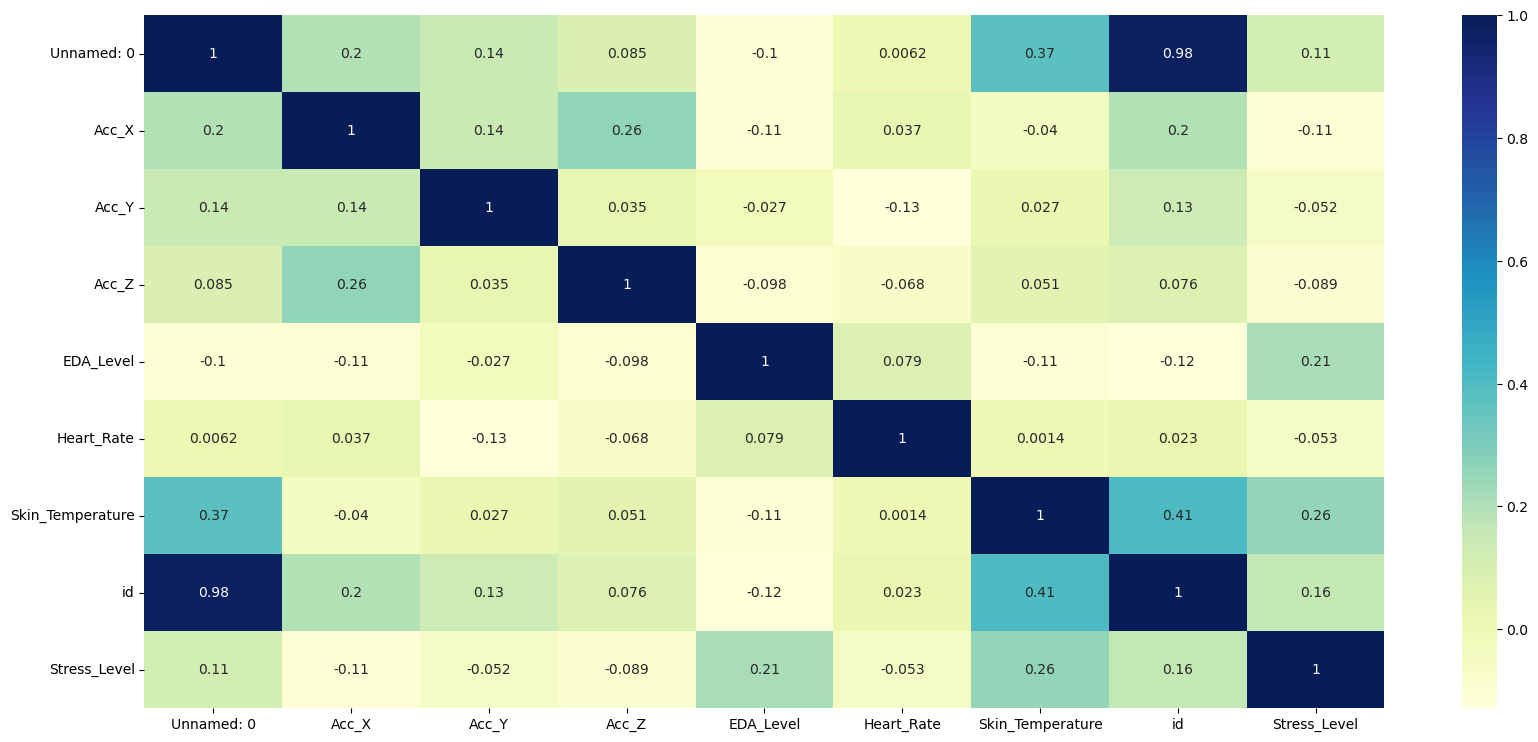

In [15]:
# Set the size of the figure
plt.figure(figsize=(20,9))

# Generate the heatmap plot of the correlation matrix
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# Display the plot
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547614 entries, 0 to 3547613
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   Acc_X             float64       
 2   Acc_Y             float64       
 3   Acc_Z             float64       
 4   EDA_Level         float64       
 5   Heart_Rate        float64       
 6   Skin_Temperature  float64       
 7   id                int32         
 8   datetime          datetime64[ns]
 9   Stress_Level      float64       
dtypes: datetime64[ns](1), float64(7), int32(1), int64(1)
memory usage: 257.1 MB


In [17]:
# Drop the "datetime" column from the DataFrame
df = df.drop(['datetime'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split   # spliting the dataset
# Define the predictors and target variables
predictors=df.drop("Stress_Level",axis=1)  
target=df["Stress_Level"]

# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [19]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
# Use the trained model to make predictions on the test data
y_pred_test = lr.predict(X_test)

# Print the predicted values
y_pred_test

array([2., 2., 2., ..., 2., 2., 2.])

In [22]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score of the model on the test data
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7379


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_val_predict
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Use k-fold cross-validation to evaluate model performance
scores = cross_val_score(log_reg, predictors, target, cv=5)
y_pred = cross_val_predict(log_reg, predictors, target, cv=5)

# Calculate and print the accuracy score of the model
accuracy = accuracy_score(target, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.738


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


df_lag = pd.read_csv('./cleaned_dataset.csv')
train_set = df_lag.iloc[:,0:48]
labels = df_lag.iloc[:,48:49]

#Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth=15)

# Split our data
train, test, train_labels, test_labels = train_test_split(predictors, target, test_size=0.50, random_state=20)
# predictors=df_lag.drop("Stress_Level",axis=1)  
# target=df_lag["Stress_Level"]


# train,test,train_labels,test_labels = train_test_split(predictors,target,test_size=0.20,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train, train_labels.values.ravel())



C:\Users\heman\AppData\Local\Temp\ipykernel_21584\3138401963.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lag = pd.read_csv('./cleaned_dataset.csv')


RandomForestClassifier(max_depth=15)

In [35]:
y_pred = clf.predict(test)

f1score   = f1_score        (test_labels, y_pred, average = 'macro')
recall    = recall_score    (test_labels, y_pred, average = 'macro')
precision = precision_score (test_labels, y_pred, average = 'macro')
accuracy  = accuracy_score  (test_labels, y_pred)

print('acc =', accuracy)
print('pre =', precision)
print('recall =', recall) 
print('f1 =', f1score)

acc = 0.9999994362408086
pre = 0.999998924523026
recall = 0.9999996179992635
f1 = 0.9999992712604935
